# **Stellar Object Classification**
_John Andrew Dixon_

---

#### **Data Dictionary**

|**Column Name**|**Description**| 
|-|-|
|obj_ID|Object Identifier, the unique value that identifies the object in the image catalog used by the CAS|
|alpha|Right Ascension angle (at J2000 epoch)|
|delta|Declination angle (at J2000 epoch)|
|u|Ultraviolet filter in the photometric system|
|g|Green filter in the photometric system|
|r|Red filter in the photometric system|
|i|Near Infrared filter in the photometric system|
|z|Infrared filter in the photometric system|
|run_ID|Run Number used to identify the specific scan|
|rereun_ID|Rerun Number to specify how the image was processed|
|cam_col|Camera column to identify the scanline within the run|
|field_ID|Field number to identify each field|
|spec_obj_ID|Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)|
|class|object class (galaxy, star or quasar object)|
|redshift|redshift value based on the increase in wavelength|
|plate|plate ID, identifies each plate in SDSS|
|MJD|Modified Julian Date, used to indicate when a given piece of SDSS data was taken|
|fiber_ID|fiber ID that identifies the fiber that pointed the light at the focal plane in each observation|

#### **Setup**

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRviGqwoVRVF_HY9LcyDLvVEDpdqZKvk1mL6K9xiWpEFh_i2QF4AX13P96L9F6nIAsD0iF0JZmcJ69A/pub?output=csv"
df = pd.read_csv(url)
stellar_df = df.copy()
df.sample(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
74277,1.237654e+18,173.892311,63.865306,21.61391,21.01470,20.86493,20.64312,20.16857,2078,301,2,70,8.008743e+18,QSO,0.776871,7113,56711,788
16462,1.237652e+18,202.152406,-0.085806,19.16225,17.71145,16.95645,16.56119,16.27867,1404,301,3,21,3.356053e+17,GALAXY,0.078884,298,51955,317
26380,1.237664e+18,118.684404,53.513738,20.01132,18.27774,17.63394,17.21671,17.02512,4264,301,5,120,2.105538e+18,GALAXY,0.170053,1870,53383,384
50029,1.237664e+18,197.656742,40.075630,19.26575,17.91738,17.40613,17.24811,17.12325,4382,301,5,56,3.265235e+18,STAR,0.000027,2900,54569,456
17908,1.237665e+18,212.210946,30.754460,19.96747,19.56766,19.01011,18.59430,18.45593,4576,301,1,603,2.392599e+18,QSO,0.183476,2125,53795,226


#### **Helper Functions**

In [63]:
# TBD

---
## **Explanatory Analysis**

#### **Cleaning**

Duplicate check and removal:

In [64]:
stellar_df.duplicated().sum()

0

In [65]:
a = stellar_df.loc[stellar_df["obj_ID"].duplicated(keep="first"), :].iloc[0, 0]
stellar_df.loc[stellar_df["obj_ID"] == a, ]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
21,1.237658e+18,144.785293,46.826496,24.54793,22.33601,20.92259,19.87177,19.16934,2821,301,2,28,8.237292e+18,STAR,-0.000120,7316,56710,756
72,1.237658e+18,144.742439,46.967191,20.87676,20.61914,20.55744,20.54716,20.15146,2821,301,2,28,8.237289e+18,QSO,1.040196,7316,56710,745
157,1.237658e+18,144.811691,46.920477,24.45142,21.51859,20.46167,19.93067,19.51852,2821,301,2,28,8.237291e+18,STAR,-0.000186,7316,56710,755
1748,1.237658e+18,144.846089,47.005872,26.39015,22.00114,20.28762,19.15424,18.69907,2821,301,2,28,9.390415e+17,GALAXY,0.594444,834,52316,149
1771,1.237658e+18,144.866565,46.837194,22.50162,20.53223,18.90075,18.25920,17.92108,2821,301,2,28,8.386864e+18,GALAXY,0.321112,7449,56740,130


> There are no duplicates, meaning every row/sample of the original dataset represents a unique stellar object.

Unnecessary column check and removal:

In [66]:
stellar_df.nunique()

obj_ID         77332
alpha          99997
delta          99999
u              93748
g              92651
r              91901
i              92019
z              92007
run_ID           430
rerun_ID           1
cam_col            6
field_ID         856
spec_obj_ID    98431
class              3
redshift       94787
plate           6284
MJD             2180
fiber_ID        1000
dtype: int64

> As of right now, the only unnecessary column is `rerun_ID` because all 100,000 samples have the same value for this column. Keeping this column adds nothing.

In [67]:
stellar_df.drop(columns="rerun_ID", inplace=True)

Categorical Inconsistencies check and fix:

In [68]:
stellar_df["class"].value_counts(normalize=True)

GALAXY    0.59445
STAR      0.21594
QSO       0.18961
Name: class, dtype: float64

> There are no categorical inconsistencies. Additionally, it's good to note that the classes are fairly unbalanced.

Outlier check and fix:

In [69]:
stellar_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237688e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,3.511610,186.130520,5.783893e+18,0.576661,5137.009660,55588.647500,449.312740
std,2.311265e+14,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,1.586912,149.011073,3.324026e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237669e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.240000e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Univariate visualizations:

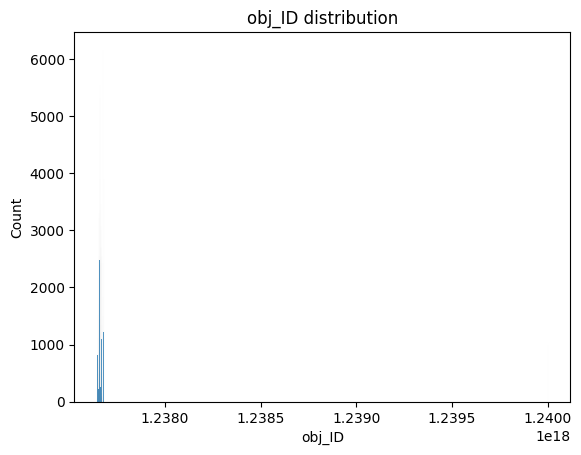

In [96]:
sns.histplot(data=df, x="obj_ID")
plt.title("obj_ID distribution");

> For the most part, the distribution of this feature is very hard to discern due to the gargantuan numbers each `obj_ID` has. Given that `obj_ID` is a composite of multiple different fields within this dataset, I may remove it in the future. As of now, I am keeping it.

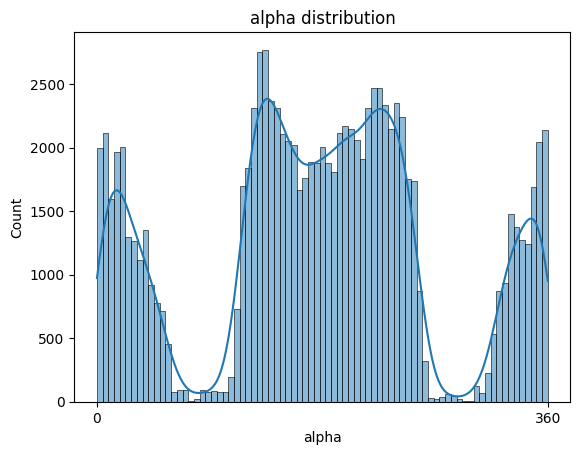

In [98]:
sns.histplot(data=df, x="alpha", bins="auto");
plt.xticks(ticks=[df["alpha"].min(), df["alpha"].max()])
plt.title("alpha distribution");

> It appears the distribution of the `alpha` feature is multimodal. There are three distinct sections and I believe each is representative of the class within the `class` feature.

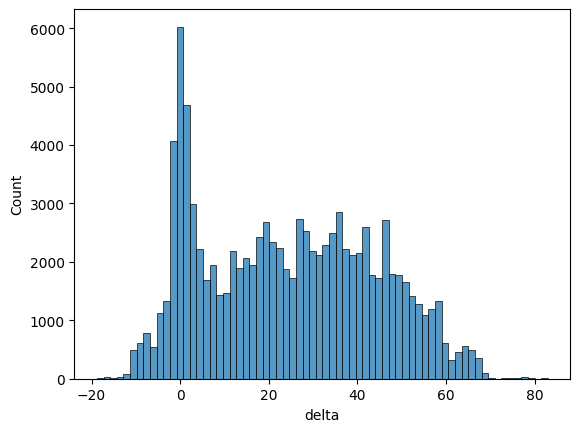

In [72]:
sns.histplot(data=df, x="delta", bins="auto");

([<matplotlib.axis.XTick at 0x16c3e8cabc0>,
 [Text(-9999.0, 0, '−9999'), Text(32.78139, 0, '33')])

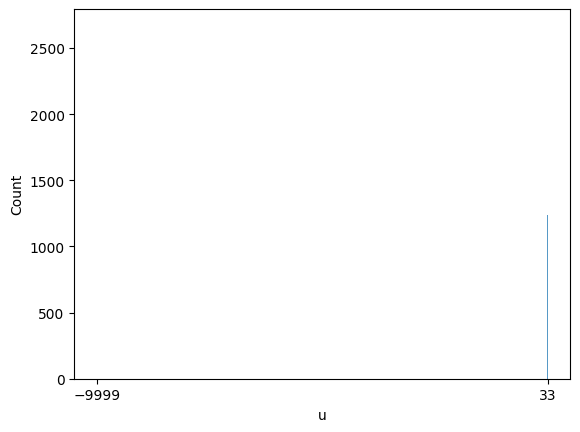

In [99]:
sns.histplot(data=df, x="u", bins="auto");
plt.xticks(ticks=[df["u"].min(), df["u"].max()])

In [74]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

Personal Check-List:
- Implement some type of feature selection/engineering.
- Create simple imputers based on distributions.
- Check class imbalance and fix it if imbalanced.
- Train-test split with stratify so the testing data has good class balance.
- Implement some of project 2 rubric's recommendations.